In [384]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import silhouette_score
from tslearn.metrics import cdist_dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.preprocessing import TimeSeriesScalerMinMax
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [385]:
seed = 0
np.random.seed(seed)

data_path = '..\data\processed\\time_series[Transformation].csv'
df_data = pd.read_csv(data_path)
df_data['ts'] = pd.to_datetime(df_data['ts'])
df_data = df_data.set_index('ts')
df_data

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
ts,,,,,,,,,,,,,,,,,,,,,
2017-01-01,28.211429,28.390057,28.037330,27.599527,27.429513,27.478603,27.865062,30.922080,33.243550,34.758886,...,37.112106,37.329167,36.346139,33.787075,28.282810,28.564218,28.799545,28.886296,28.749886,29.046273
2017-01-02,29.081057,28.542816,27.888466,27.821665,27.336513,26.697399,27.655248,28.847708,31.446969,34.926794,...,37.801067,38.886947,37.097700,36.670188,35.305760,32.934560,32.518408,30.447610,30.292165,30.155720
2017-01-03,29.583827,29.203598,28.931031,28.573913,28.587000,28.464002,28.766867,31.538068,34.456579,36.787640,...,39.799068,39.365378,36.042456,32.452484,32.725149,31.914443,30.994246,28.452908,26.948674,28.122324
2017-01-04,28.298675,27.696132,27.235239,27.110961,27.437519,27.519342,27.629404,28.493021,30.121089,31.508817,...,35.229504,33.817783,36.624941,35.994808,34.561864,32.872029,32.730542,32.468668,32.280141,31.880592
2017-01-05,31.416974,31.331718,31.060982,30.838037,29.965732,29.679887,30.753258,32.972058,34.163906,35.225972,...,33.065021,33.454441,33.519411,34.235118,34.100284,31.928876,30.954963,30.251804,30.746057,30.347247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,14.644382,11.480943,8.997995,7.973383,7.767785,6.782759,6.639465,6.419949,9.018696,14.172663,...,21.374026,22.153984,22.746685,21.515534,18.813309,16.555077,15.915897,14.991135,15.364472,15.817937
2020-05-28,14.625015,13.443043,12.719469,11.854189,11.307924,9.896346,10.232020,9.290381,10.854423,13.785415,...,21.744657,22.940362,23.308785,23.236624,20.176052,18.726430,17.579284,16.361154,15.282457,15.379565
2020-05-29,13.527725,14.148866,13.235002,12.719469,12.175348,11.692325,11.142114,10.727182,12.557050,15.385981,...,24.791106,26.422077,26.296009,25.359231,22.153984,20.124817,18.852970,16.181168,15.552544,14.443239


In [386]:
X = df_data.values.copy()

X_train = TimeSeriesScalerMeanVariance().fit_transform(X)
#X_train.shape
#print(X_train2)

#sc1 = StandardScaler()
#X_train = sc1.fit_transform(X)
#X_train.shape

903.6451076882236
791.0505456629417
917.9053693336633
986.222391262966
1047.6401723586505
1082.7359175295621
1113.7087748054246
1140.0896101114026
1157.2845916155866


<IPython.core.display.Javascript object>


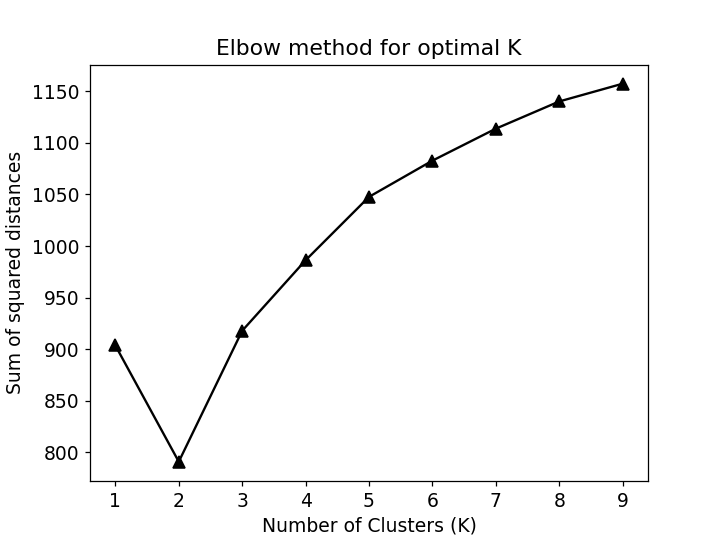

In [381]:
K = range(1,10)
sum_of_squared_distances = [] 
labels = []
for k in K:
    sdtw_km = TimeSeriesKMeans(n_clusters=k,
                           metric="softdtw",
                           metric_params={"gamma": 1},
                           init='random',
                           random_state=seed,
                           max_iter=100)
    y_pred = sdtw_km.fit_predict(X_train)
    sum_of_squared_distances.append (sdtw_km.inertia_)
    print(sdtw_km.inertia_)
    #coff = silhouette_score(X_train, y_pred, metric="softdtw",metric_params={"gamma": 1})
    labels.append(str(k))
plt.figure('K OPTIMAL')   
plt.plot(np.arange(len(K)), sum_of_squared_distances,'^-k',markersize=8)
plt.xticks(np.arange(len(K)),labels,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Number of Clusters (K)',fontsize=12)
plt.ylabel('Sum of squared distances',fontsize=12)
plt.title('Elbow method for optimal K',fontsize=14)
plt.show()


<IPython.core.display.Javascript object>


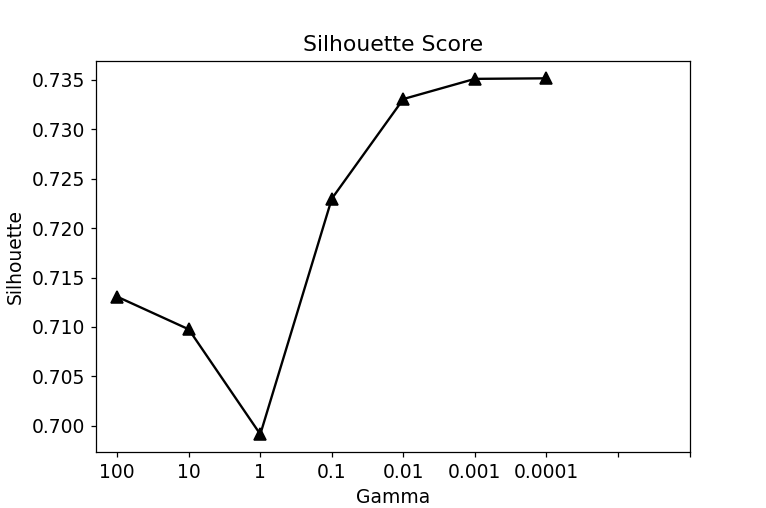

In [383]:
gammas = [100,10,1,1e-1,1e-2,1e-3,1e-4]
silhouettes = []
labels = []
for g in gammas:
    sdtw_km = TimeSeriesKMeans(n_clusters=2,
                           metric="softdtw",
                           metric_params={"gamma": g},
                           init='random',
                           random_state=seed,
                           max_iter=100)
    y_pred = sdtw_km.fit_predict(X_train)
    coff = silhouette_score(X_train, y_pred, metric="softdtw",metric_params={"gamma": g})
    silhouettes.append(coff)
    labels.append(str(g))
plt.figure('Gamma Optimal')   
plt.plot(np.arange(len(gammas)),silhouettes,'^-k',markersize=8)
plt.xticks(np.arange(len(K)),labels,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Gamma',fontsize=12)
plt.ylabel('Silhouette',fontsize=12)
plt.title('Silhouette Score',fontsize=14)
plt.show()

In [ ]:
interval = 25
number_cluster = 2
km = TimeSeriesKMeans(n_clusters = number_cluster,
                           metric = "softdtw",
                           metric_params = {"gamma": 1e-4},
                           init = 'random',
                           random_state = seed,
                           max_iter = 20,
                           verbose = True)

y_pred = km.fit_predict(X_train)
coff2 = silhouette_score(X_train, y_pred, metric="softdtw",metric_params={"gamma": 1e-4})
print('Silhoutte: ',coff2)
cluster_found_sr = pd.Series(y_pred, name='cluster')

df_cluster = df_data.copy()
df_cluster['cluster'] = y_pred

df_data = df_data.set_index(cluster_found_sr, append=True )
cluster_values = sorted(df_data.index.get_level_values('cluster').unique())

centroids = sc.inverse_transform(km.cluster_centers_[:,:,0])

11.310 --> 

<IPython.core.display.Javascript object>


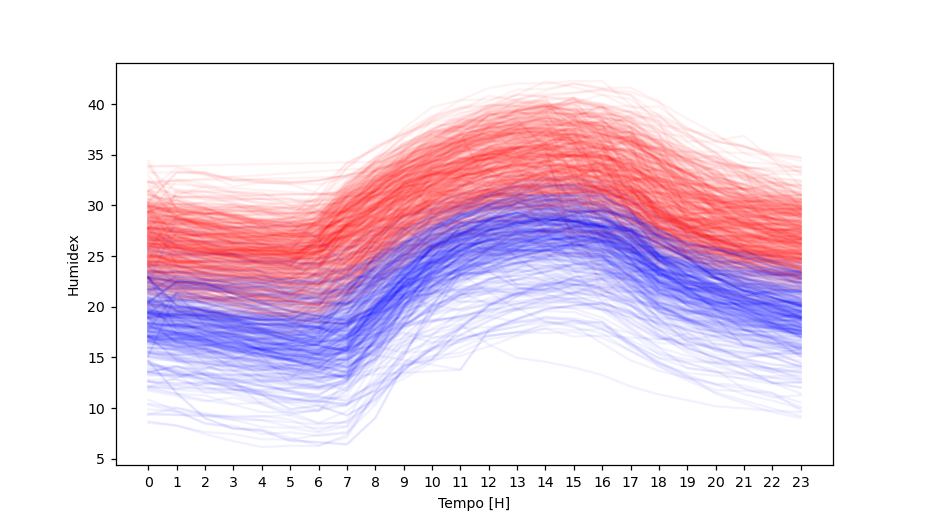

0  Dias:  (497, 24)
1  Dias:  (385, 24)


In [380]:
color_list = ['red','blue','green','orange','yellow','black','purple','skyblue','cyan','brown']
#LS = ['--','-','-.','-','--',':'] 
plt.figure('-')
for cluster, color in zip(cluster_values, color_list):
    curvas = df_data.xs(cluster, level=1)
    plt.plot(np.arange(0,interval-1),curvas.T, alpha=0.05, color=color)
    #plt.plot(np.arange(1,interval),centroids[cluster][:interval-1].ravel(),color=color,
    #         label= f'C{cluster}',alpha=0.9, ls=LS[cluster])
    print(cluster,' Dias: ',curvas.shape)
plt.xticks(np.arange(0,interval-1),np.arange(0,interval-1),fontsize=9)
plt.yticks(fontsize=9)
plt.ylabel('Humidex',fontsize=9)
plt.xlabel('Tempo [H]',fontsize=9)
plt.show()

In [326]:
df_cluster.to_csv('..\data\processed\data_clustering[DataMining].csv')

In [352]:
df_cluster

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,cluster
ts,,,,,,,,,,,,,,,,,,,,,
2017-01-01,28.211429,28.390057,28.037330,27.599527,27.429513,27.478603,27.865062,30.922080,33.243550,34.758886,...,37.329167,36.346139,33.787075,28.282810,28.564218,28.799545,28.886296,28.749886,29.046273,0
2017-01-02,29.081057,28.542816,27.888466,27.821665,27.336513,26.697399,27.655248,28.847708,31.446969,34.926794,...,38.886947,37.097700,36.670188,35.305760,32.934560,32.518408,30.447610,30.292165,30.155720,0
2017-01-03,29.583827,29.203598,28.931031,28.573913,28.587000,28.464002,28.766867,31.538068,34.456579,36.787640,...,39.365378,36.042456,32.452484,32.725149,31.914443,30.994246,28.452908,26.948674,28.122324,0
2017-01-04,28.298675,27.696132,27.235239,27.110961,27.437519,27.519342,27.629404,28.493021,30.121089,31.508817,...,33.817783,36.624941,35.994808,34.561864,32.872029,32.730542,32.468668,32.280141,31.880592,0
2017-01-05,31.416974,31.331718,31.060982,30.838037,29.965732,29.679887,30.753258,32.972058,34.163906,35.225972,...,33.454441,33.519411,34.235118,34.100284,31.928876,30.954963,30.251804,30.746057,30.347247,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,14.644382,11.480943,8.997995,7.973383,7.767785,6.782759,6.639465,6.419949,9.018696,14.172663,...,22.153984,22.746685,21.515534,18.813309,16.555077,15.915897,14.991135,15.364472,15.817937,1
2020-05-28,14.625015,13.443043,12.719469,11.854189,11.307924,9.896346,10.232020,9.290381,10.854423,13.785415,...,22.940362,23.308785,23.236624,20.176052,18.726430,17.579284,16.361154,15.282457,15.379565,1
2020-05-29,13.527725,14.148866,13.235002,12.719469,12.175348,11.692325,11.142114,10.727182,12.557050,15.385981,...,26.422077,26.296009,25.359231,22.153984,20.124817,18.852970,16.181168,15.552544,14.443239,1


<IPython.core.display.Javascript object>


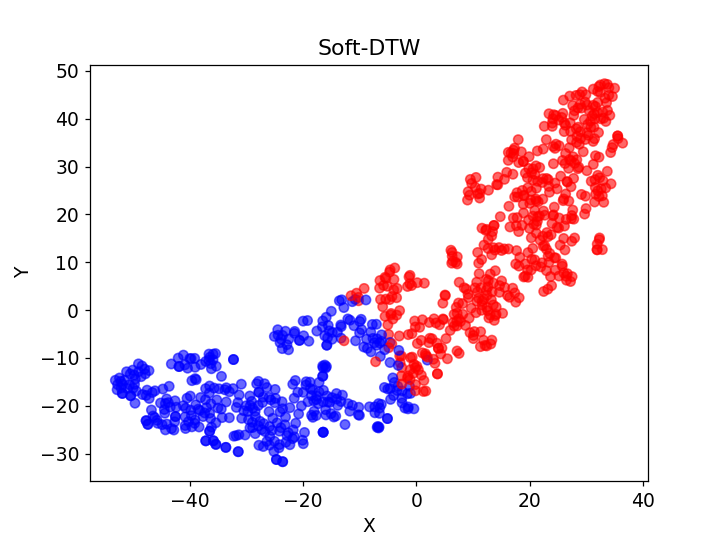

In [376]:
def dimensionalidadTSNE(X,y_pred):
    color_list = ['red','blue','green','orange','yellow','black','purple','skyblue','cyan','brown']
    tsne = TSNE()
    results_tsne = tsne.fit_transform(X)
    
    color_cluster = ['']*len(y_pred)
    for i in range(len(y_pred)):
        for ck in range(11):
            if(y_pred[i] == ck): color_cluster[i]=color_list[ck]
        
    plt.figure('DIMENSION-KM')
    plt.scatter(results_tsne[:,0], results_tsne[:,1],
        c=color_cluster,
        alpha=0.6)
    
    plt.title('Soft-DTW',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Y',fontsize=12)
    plt.xlabel('X',fontsize=12)
    plt.show()
    return results_tsne

results_tsne = dimensionalidadTSNE(X_train,y_pred)


In [377]:
coff2 = silhouette_score(results_tsne, y_pred, metric="softdtw",metric_params={"gamma": 1e-4})
print('Silhoutte: ',coff2)

Silhoutte:  0.7151791046092795


In [359]:
Hmax = []
Hora = []
cluster = []
for i in range(df_cluster.shape[0]):
    Hmax.append(df_cluster.iloc[i,:-1].values.max())
    Hora.append(df_cluster.iloc[i,:-1].values.argmax())
    if df_cluster.iloc[i,-1]==0:
        cluster.append(1)
    else:
        cluster.append(0)
    
df_cluster_humidex = {
    'Hora' : Hora,
    'Hmax' : Hmax,
    'cluster' : cluster
}
df_cluster_humidex = pd.DataFrame(data=df_cluster_humidex,index=df_cluster.index)
df_cluster_humidex

,Hora,Hmax,cluster
ts,,,
2017-01-01,13,37.998761,1
2017-01-02,15,38.886947,1
2017-01-03,12,39.885910,1
2017-01-04,16,36.624941,1
2017-01-05,11,37.420010,1
...,...,...,...
2020-05-27,16,22.746685,0
2020-05-28,16,23.308785,0
2020-05-29,15,26.422077,0


In [360]:
df_cluster_humidex.to_csv('..\data\processed\data_Hmax_hora[DataMining].csv')